In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
btc = pd.read_csv("btc_transform.csv")  # Read in file

In [3]:
btc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-11,908.114990,919.447998,762.765015,777.757019,777.757019,310928992
1,2017-01-12,775.177979,826.245972,755.755981,804.833984,804.833984,222326000
2,2017-01-13,803.737000,829.000977,780.002991,823.984009,823.984009,168968000
3,2017-01-14,825.142029,835.085022,812.455994,818.411987,818.411987,93063296
4,2017-01-15,818.142029,823.307007,812.870972,821.797974,821.797974,71013600
...,...,...,...,...,...,...,...
1822,2022-01-07,43153.570313,43153.570313,41077.445313,41557.902344,41557.902344,84196607520
1823,2022-01-08,41561.464844,42228.941406,40672.277344,41733.941406,41733.941406,28066355845
1824,2022-01-09,41734.726563,42663.949219,41338.160156,41911.601563,41911.601563,21294384372
1825,2022-01-10,41910.230469,42199.484375,39796.570313,41821.261719,41821.261719,32104232331


# Build and Test Predictive Models

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import (
    KNeighborsRegressor,
    KNeighborsClassifier)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    LogisticRegression
)
from sklearn.ensemble import (
    BaggingClassifier,
    BaggingRegressor,
    RandomForestRegressor,
    RandomForestClassifier
)
from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    plot_confusion_matrix,
    precision_score,
    recall_score
)
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    train_test_split
)
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor,
    plot_tree
)

### Select subset of data and do train_test_split

In [30]:
btc_2022 = btc[btc['Year'] == 2021 | 2022]  # Separate 2022 data

btc = btc[btc['Year'] != 2021 | 2022]  # Remove 2022 data from the model

### Predict against 'AVG_Weighted_Future_Return' 

In [31]:
# Get Y and X variables

Y = btc['AVG_Weighted_Future_Return']

X = btc.iloc[:, np.r_[3:4,6,8:32]]

# Split out Test Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Collect 2022 data that the model will be applied to

Z = btc_2022.iloc[:, np.r_[3:4,6,8:32]]

### Linear Regression

In [32]:
# Linear Regression

simple_linear_regression = LinearRegression().fit(X_train, Y_train)

In [33]:
mean_squared_error(Y_train, simple_linear_regression.predict(X_train))

0.0018611654483913069

In [34]:
mean_squared_error(Y_test, simple_linear_regression.predict(X_test))

0.00216127742746468

### LASSO Regression 

In [35]:
# Lasso

lasso_pipeline = make_pipeline(Lasso())

alpha_candidates = np.logspace(-2.0, 1.0)

alpha_search = GridSearchCV(lasso_pipeline,
             {'lasso__alpha': alpha_candidates},
             cv=10).fit(X_train,Y_train)

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8648794004970544, tolerance: 0.00017975261390521232
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.878895172882357, tolerance: 0.00018241423825076657
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8189604348763456, tolerance: 0.0001719667929473248
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: C

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8686226272490278, tolerance: 0.00018241423825076657
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8033456820407153, tolerance: 0.0001719667929473248
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8190638818751932, tolerance: 0.0001831245905537193
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: C

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7763187621538936, tolerance: 0.0001831245905537193
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.843323093331881, tolerance: 0.00018188671411527906
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8562677508243297, tolerance: 0.00018589080413338366
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: C

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8018320179829082, tolerance: 0.00017867233355754362
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8250195853552781, tolerance: 0.00018030815526137505
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.789165040147096, tolerance: 0.00017975261390521232
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: 

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7633073245734454, tolerance: 0.00018589080413338366
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7676936500822364, tolerance: 0.00017973803186012528
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.666961210218609, tolerance: 0.0001814563755606575
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: C

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6811464202164564, tolerance: 0.00017867233355754362
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7215924173366972, tolerance: 0.00018030815526137505
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.64623044159091, tolerance: 0.00017975261390521232
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: C

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.44738928819086815, tolerance: 0.0001719667929473248
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2931392057525153, tolerance: 0.0001831245905537193
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5568385112905225, tolerance: 0.00018188671411527906
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: 

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2664873582236492, tolerance: 0.0001814563755606575
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3914881618058814, tolerance: 0.00017867233355754362
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.45308875777262014, tolerance: 0.00018030815526137505
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529:

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2032902607717636, tolerance: 0.00018030815526137505
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1633636038853914, tolerance: 0.00017975261390521232
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3282723572383415, tolerance: 0.00018241423825076657
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529:

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.029304049238415564, tolerance: 0.00017867233355754362
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010371962961782, tolerance: 0.00018030815526137505
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0069887821364442715, tolerance: 0.00017975261390521232
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002236247006483172, tolerance: 0.00018241423825076657
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013712531940208716, tolerance: 0.00018241423825076657
  model = cd_fast.enet_coordinate_descent(
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006154878371646966, tolerance: 0.00018241423825076657
  model = cd_fast.enet_coordinate_descent(


In [36]:
best_alpha = alpha_search.best_params_.get("lasso__alpha")
best_alpha

10.0

In [37]:
lasso_fit = Lasso(alpha = best_alpha).fit(X_train, Y_train)

In [38]:
mean_squared_error(Y_train, lasso_fit.predict(X_train))

0.0019635301888130514

In [39]:
mean_squared_error(Y_test, lasso_fit.predict(X_test))

0.0022681858526457897

### Decision Tree 

In [40]:
# Decision Tree

grid_search_cv_dt = GridSearchCV(DecisionTreeRegressor(random_state=42),
                              param_grid=dict(min_impurity_decrease=np.arange(-2.00, 2.00, 0.01)),
                              cv=KFold(n_splits=2, shuffle=True, random_state=42)).fit(X_train, Y_train)

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

In [41]:
grid_search_cv_dt.best_params_

{'min_impurity_decrease': 0.010000000000001563}

In [42]:
mean_squared_error(Y_train, grid_search_cv_dt.best_estimator_.predict(X_train))

0.0019685221571381713

In [43]:
mean_squared_error(Y_test, grid_search_cv_dt.best_estimator_.predict(X_test))

0.002264269908118554

### Bagged Tree 

In [44]:
# Bagging

bag_fit = BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=42, max_depth=5),random_state=42).fit(X_train, Y_train)

In [45]:
mean_squared_error(Y_train, bag_fit.predict(X_train))

0.0014358099781549363

In [46]:
mean_squared_error(Y_test, bag_fit.predict(X_test))

0.002083145207316574

### Random Forrest 

In [47]:
# Random Forest

rf_fit = RandomForestRegressor(random_state = 42).fit(X_train, Y_train)

In [48]:
mean_squared_error(Y_train, rf_fit.predict(X_train))

0.00021181715582437683

In [49]:
mean_squared_error(Y_test, rf_fit.predict(X_test))

0.0018634018639164505

### KNN

In [50]:
# KNN

knn_pipeline = make_pipeline(KNeighborsRegressor())

knn_fit = knn_pipeline.fit(X_train, Y_train)

In [51]:
mean_squared_error(Y_train, knn_fit.predict(X_train))

0.0010467846739441347

In [52]:
mean_squared_error(Y_test, knn_fit.predict(X_test))

0.001842985575290537

### Predict against 'Delta_Class_Numeric' 

In [53]:
# Get new Y variable

Y = btc['Delta_Class_Numeric']

# Split out Test Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

### Decision Tree 

In [54]:
tree = DecisionTreeClassifier(random_state=42).fit(X_train, Y_train)

In [55]:
mean_squared_error(Y_train, tree.predict(X_train))

0.0

In [56]:
mean_squared_error(Y_test, tree.predict(X_test))

0.8333333333333334

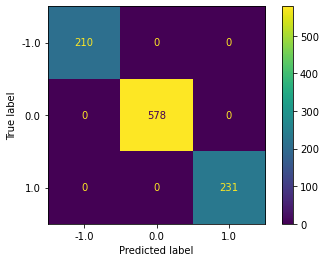

In [57]:
plot_confusion_matrix(tree, X_train, Y_train)

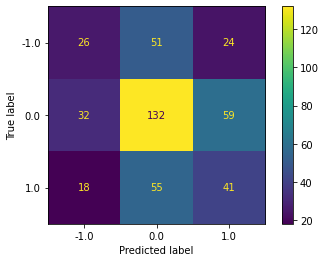

In [58]:
plot_confusion_matrix(tree, X_test, Y_test)

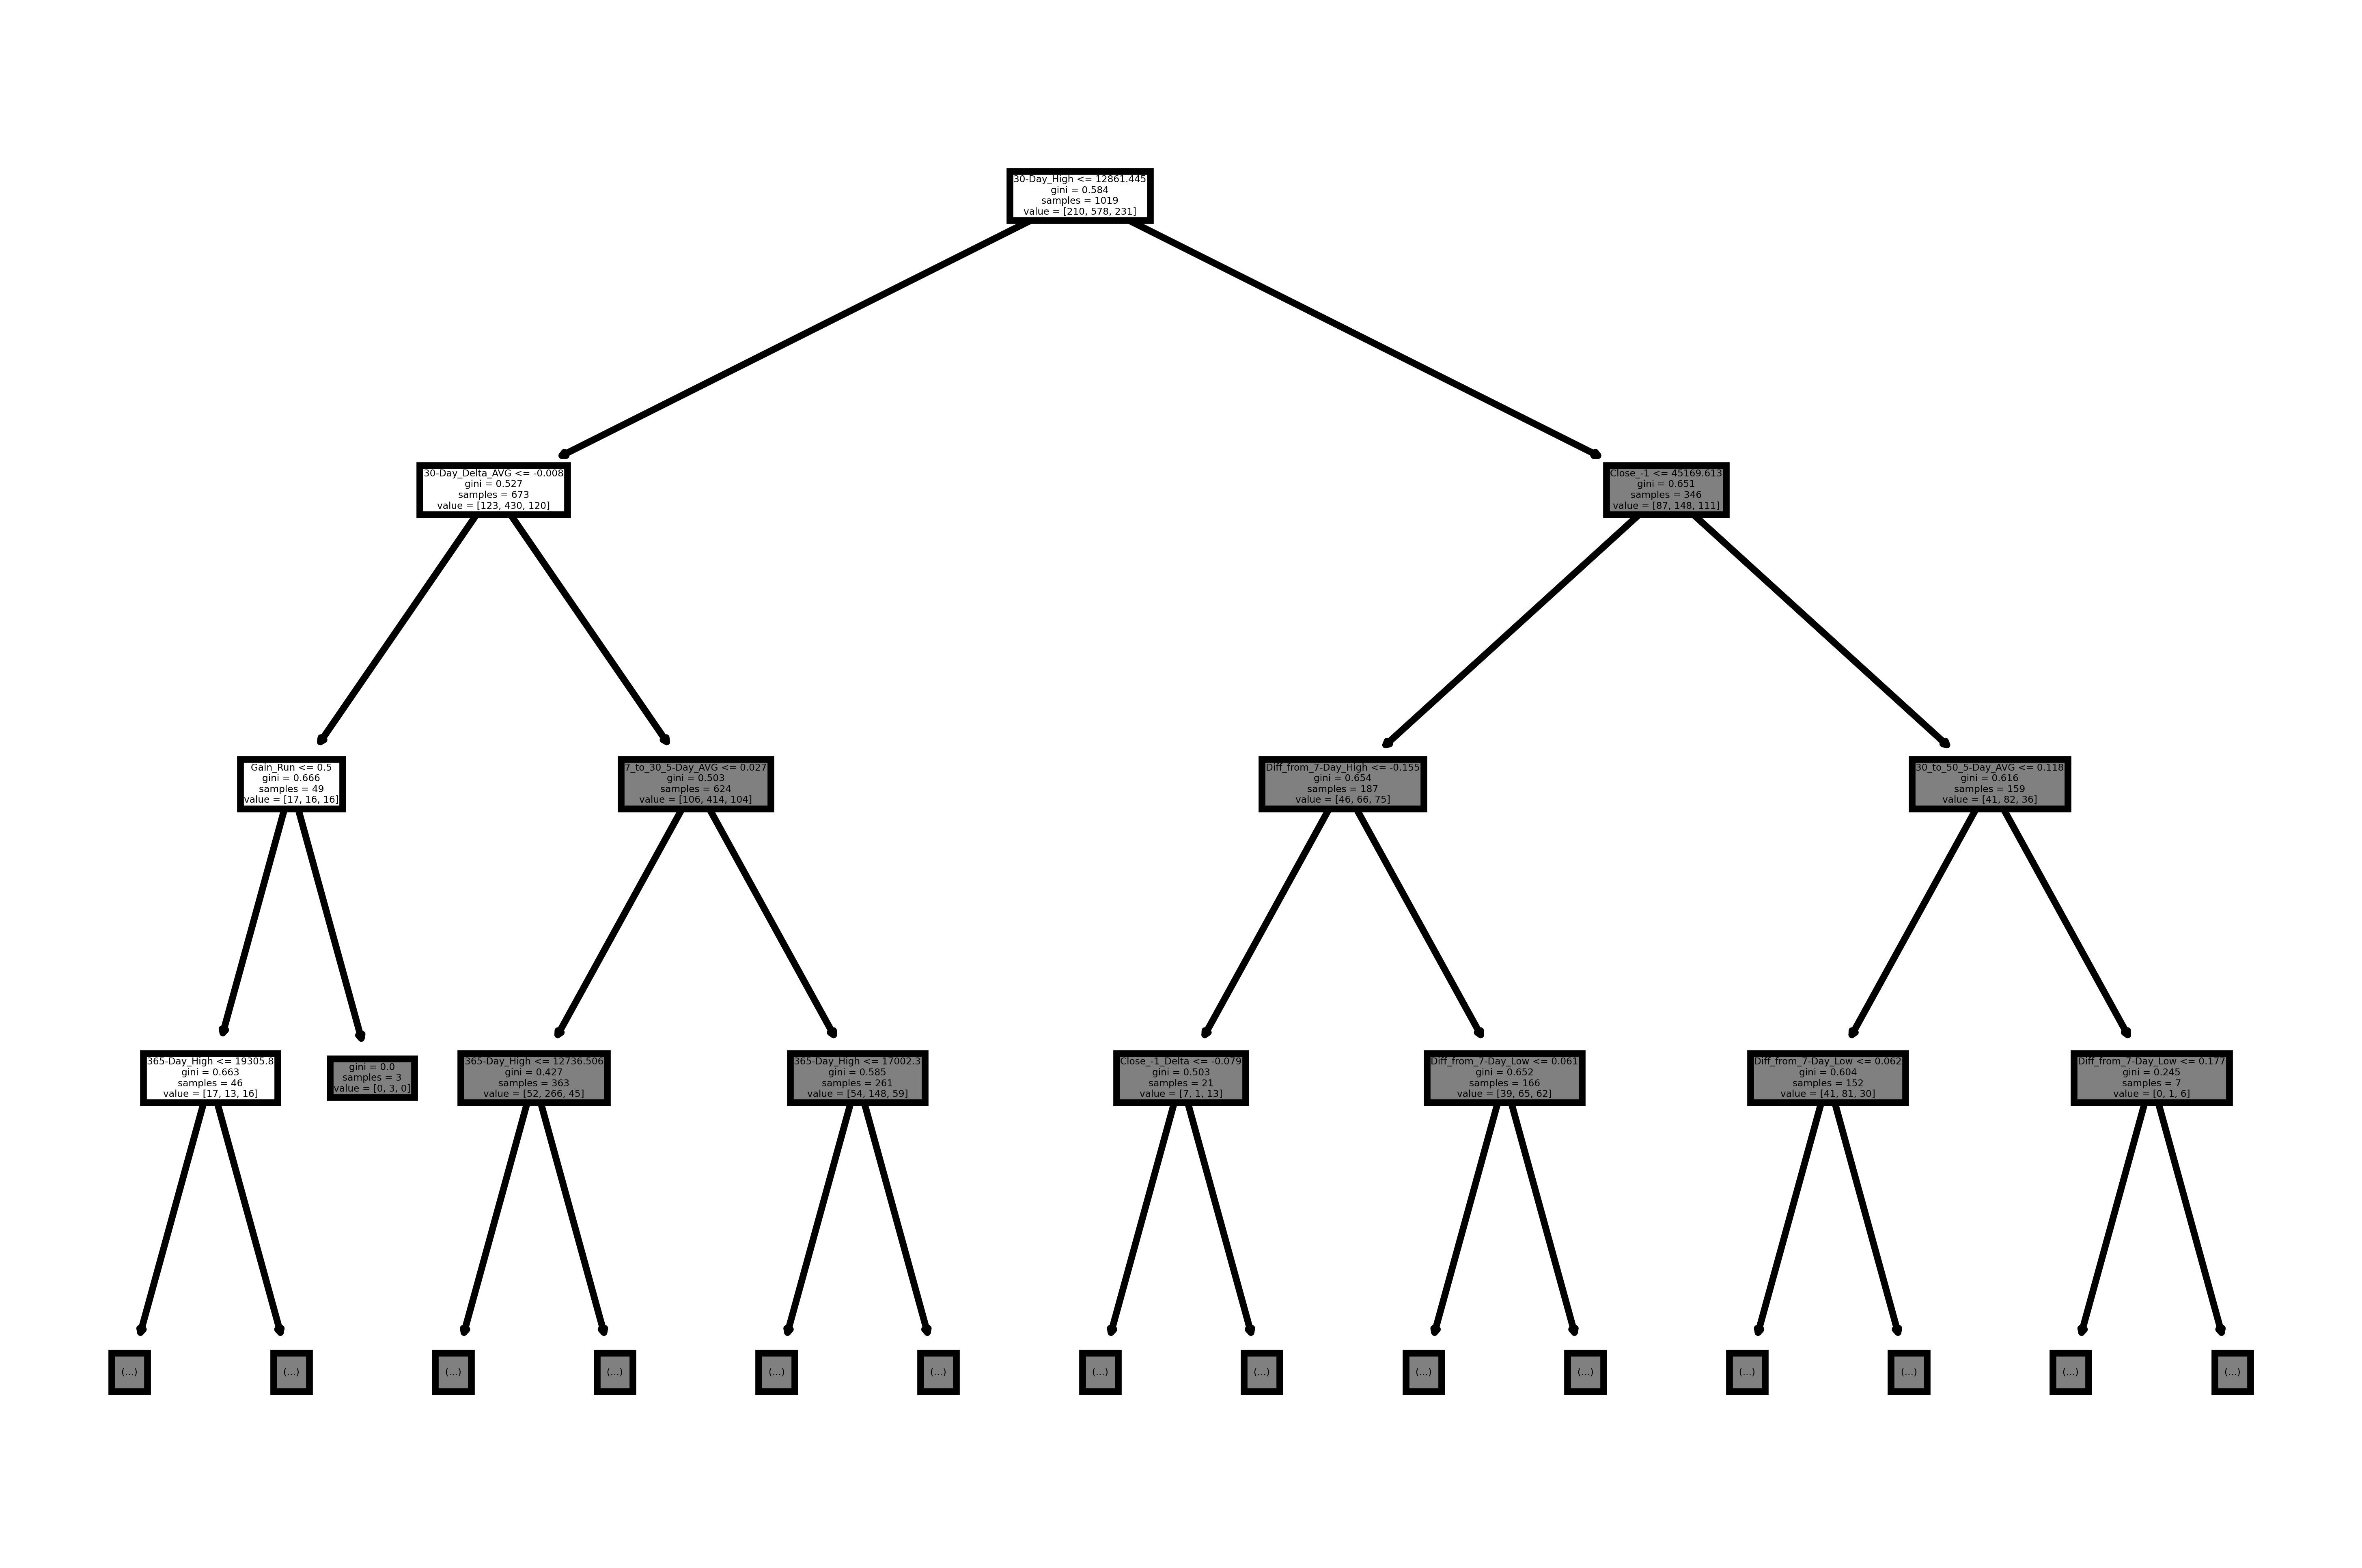

In [59]:
fig, axes = plt.subplots(1, 1, dpi=1200)
_ = plot_tree(tree, max_depth=3, feature_names=X_train.columns)

In [60]:
accuracy_score(Y_train, tree.predict(X_train))

1.0

In [61]:
precision_score(Y_train, tree.predict(X_train), average='macro')

1.0

In [62]:
recall_score(Y_train, tree.predict(X_train), average='macro')

1.0

In [63]:
accuracy_score(Y_test, tree.predict(X_test))

0.454337899543379

In [64]:
precision_score(Y_test, tree.predict(X_test), average='macro')

0.409124091062571

In [65]:
recall_score(Y_test, tree.predict(X_test), average='macro')

0.40300103883411714

### Decision Tree with Cross Validation and Optimized

In [66]:
# Decision Tree

grid_search_cv_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              param_grid=dict(min_impurity_decrease=np.arange(-2.00, 2.00, 0.01))).fit(X_train, Y_train)

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\trevo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 319, in fit
    raise ValueError("min_impurity_decrease must be greater than "
ValueError: min_impurity_decrease must be greater than or equal to 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\trevo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition

In [67]:
grid_search_cv_dt.best_params_

{'min_impurity_decrease': 0.010000000000001563}

In [68]:
mean_squared_error(Y_train, grid_search_cv_dt.best_estimator_.predict(X_train))

0.43277723258096173

In [69]:
mean_squared_error(Y_test, grid_search_cv_dt.best_estimator_.predict(X_test))

0.4908675799086758

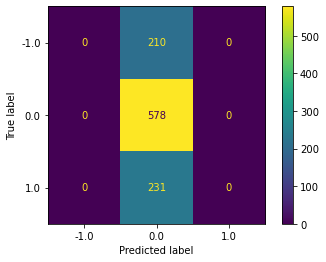

In [70]:
plot_confusion_matrix(grid_search_cv_dt, X_train, Y_train)

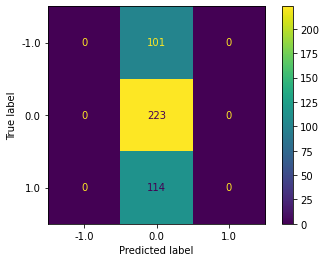

In [71]:
plot_confusion_matrix(grid_search_cv_dt, X_test, Y_test)

In [72]:
accuracy_score(Y_train, grid_search_cv_dt.predict(X_train))

0.5672227674190383

In [73]:
precision_score(Y_train, grid_search_cv_dt.predict(X_train), average='macro')

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.1890742558063461

In [74]:
recall_score(Y_train, grid_search_cv_dt.predict(X_train), average='macro')

0.3333333333333333

In [75]:
accuracy_score(Y_test, grid_search_cv_dt.predict(X_test))

0.5091324200913242

In [76]:
precision_score(Y_test, grid_search_cv_dt.predict(X_test), average='macro')

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.16971080669710806

In [77]:
recall_score(Y_test, grid_search_cv_dt.predict(X_test), average='macro')

0.3333333333333333

### Random Forrest 

In [78]:
# Random Forest

rf_fit = RandomForestClassifier(random_state = 42).fit(X_train, Y_train)

In [79]:
mean_squared_error(Y_train, rf_fit.predict(X_train))

0.0

In [80]:
mean_squared_error(Y_test, rf_fit.predict(X_test))

0.7397260273972602

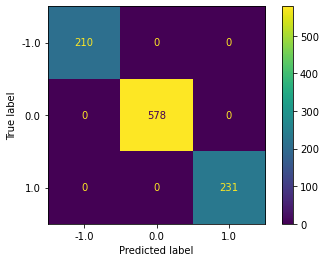

In [81]:
plot_confusion_matrix(rf_fit, X_train, Y_train) 

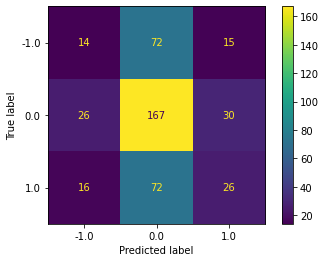

In [82]:
plot_confusion_matrix(rf_fit, X_test, Y_test)

In [83]:
accuracy_score(Y_train, rf_fit.predict(X_train))

1.0

In [84]:
precision_score(Y_train, rf_fit.predict(X_train), average='macro')

1.0

In [85]:
recall_score(Y_train, rf_fit.predict(X_train), average='macro')

1.0

In [86]:
accuracy_score(Y_test, rf_fit.predict(X_test))

0.4726027397260274

In [87]:
precision_score(Y_test, rf_fit.predict(X_test), average='macro')

0.38439155835333544

In [88]:
recall_score(Y_test, rf_fit.predict(X_test), average='macro')

0.3718543201971838

### KNN

In [89]:
# KNN

knn_pipeline = make_pipeline(KNeighborsClassifier())

knn_fit = knn_pipeline.fit(X_train, Y_train)

In [90]:
mean_squared_error(Y_train, knn_fit.predict(X_train))

0.5191364082433758

In [91]:
mean_squared_error(Y_test, knn_fit.predict(X_test))

0.8310502283105022

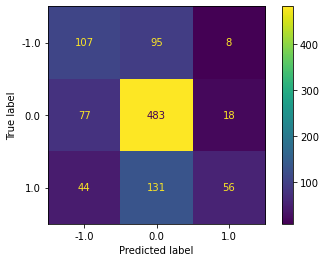

In [92]:
plot_confusion_matrix(knn_fit, X_train, Y_train) 

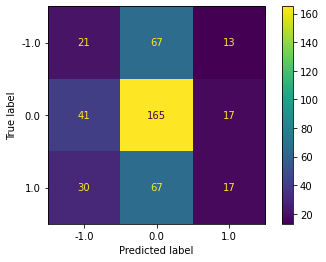

In [93]:
plot_confusion_matrix(knn_fit, X_test, Y_test)

In [94]:
accuracy_score(Y_train, knn_fit.predict(X_train))

0.633954857703631

In [95]:
precision_score(Y_train, knn_fit.predict(X_train), average='macro')

0.611155419883202

In [96]:
recall_score(Y_train, knn_fit.predict(X_train), average='macro')

0.5291960634521188

In [97]:
accuracy_score(Y_test, knn_fit.predict(X_test))

0.4634703196347032

In [98]:
precision_score(Y_test, knn_fit.predict(X_test), average='macro')

0.38060082070257834

In [99]:
recall_score(Y_test, knn_fit.predict(X_test), average='macro')

0.365651304332699

### KNN With Cross Validation and Best n_neighbors 

In [100]:
k_fold = KFold(n_splits=2, shuffle=True, random_state=42)

In [101]:
knn_pipeline = make_pipeline(StandardScaler(),
                             KNeighborsClassifier())

In [102]:
k_candidates = np.arange(1, 100)

In [103]:
grid_search_cv = GridSearchCV(knn_pipeline,
                              dict(kneighborsclassifier__n_neighbors=k_candidates),
                              cv=k_fold).fit(X_train, Y_train)

In [104]:
grid_search_cv.best_params_

{'kneighborsclassifier__n_neighbors': 73}

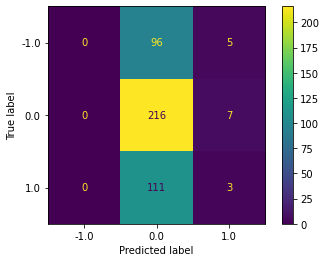

In [105]:
plot_confusion_matrix(grid_search_cv.best_estimator_, X_test, Y_test)

In [106]:
mean_squared_error(Y_train, grid_search_cv.best_estimator_.predict(X_train))

0.465161923454367

In [107]:
mean_squared_error(Y_test, grid_search_cv.best_estimator_.predict(X_test))

0.5342465753424658

In [108]:
accuracy_score(Y_train,grid_search_cv.best_estimator_.predict(X_train))

0.5583905789990187

In [109]:
precision_score(Y_train, grid_search_cv.best_estimator_.predict(X_train), average='macro')

0.3126221896383187

In [110]:
recall_score(Y_train, grid_search_cv.best_estimator_.predict(X_train), average='macro')

0.33276312307454176

In [111]:
accuracy_score(Y_test, grid_search_cv.best_estimator_.predict(X_test))

0.5

In [112]:
precision_score(Y_test, grid_search_cv.best_estimator_.predict(X_test), average='macro')

C:\Users\trevo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.23687943262411348

In [113]:
recall_score(Y_test, grid_search_cv.best_estimator_.predict(X_test), average='macro')

0.3316418849815121